In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csvs = [
    "data/final_tmdb_data_2000.csv.gz",
    "data/final_tmdb_data_2001.csv.gz"
]

dfs = []
for x in csvs:
    df = pd.read_csv(x, compression="gzip")
    dfs.append(df)

movies_df = pd.concat(dfs, ignore_index=True)

merged= "data/tmdb_results_combined.csv.gz"
movies_df.to_csv(merged, index=False, compression="gzip")

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2562 non-null   object 
 1   adult                  2560 non-null   float64
 2   backdrop_path          1389 non-null   object 
 3   belongs_to_collection  205 non-null    object 
 4   budget                 2560 non-null   float64
 5   genres                 2560 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2560 non-null   float64
 8   original_language      2560 non-null   object 
 9   original_title         2560 non-null   object 
 10  overview               2509 non-null   object 
 11  popularity             2560 non-null   float64
 12  poster_path            2303 non-null   object 
 13  production_companies   2560 non-null   object 
 14  production_countries   2560 non-null   object 
 15  rele

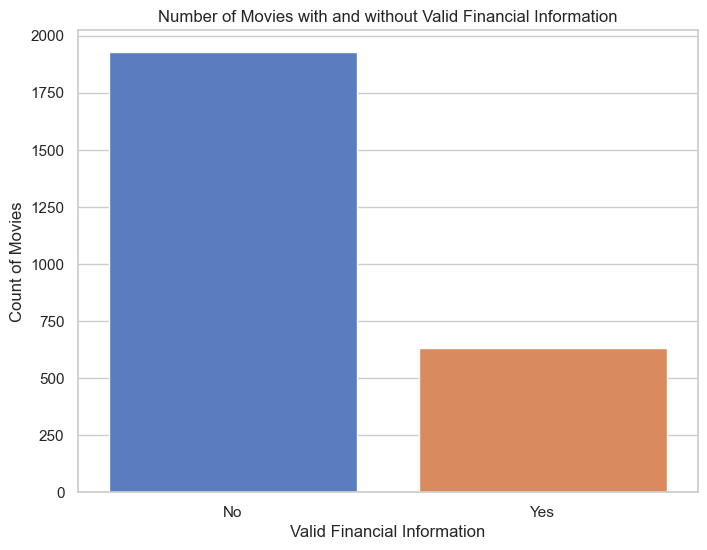

In [4]:
valid_fin_info = (movies_df['budget'] > 0) | (movies_df['revenue'] > 0)

movies_df['has_valid_fin_info'] = valid_fin_info

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='has_valid_fin_info', data=movies_df, palette="muted")
ax.set_title('Number of Movies with and without Valid Financial Information')
ax.set_xlabel('Valid Financial Information')
ax.set_ylabel('Count of Movies')
ax.set_xticklabels(['No', 'Yes'])

plt.show()


In [5]:
filtered_df = movies_df[valid_fin_info]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1 to 2540
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                634 non-null    object 
 1   adult                  634 non-null    float64
 2   backdrop_path          537 non-null    object 
 3   belongs_to_collection  109 non-null    object 
 4   budget                 634 non-null    float64
 5   genres                 634 non-null    object 
 6   homepage               76 non-null     object 
 7   id                     634 non-null    float64
 8   original_language      634 non-null    object 
 9   original_title         634 non-null    object 
 10  overview               632 non-null    object 
 11  popularity             634 non-null    float64
 12  poster_path            615 non-null    object 
 13  production_companies   634 non-null    object 
 14  production_countries   634 non-null    object 
 15  relea

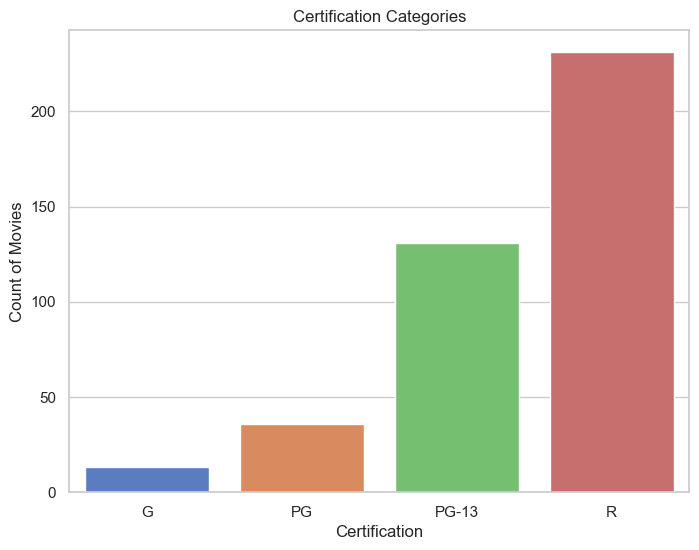

In [6]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='certification', data=filtered_df, palette="muted", order=['G', 'PG', 'PG-13', 'R'])
ax.set_title('Certification Categories')
ax.set_xlabel('Certification')
ax.set_ylabel('Count of Movies')

plt.show()

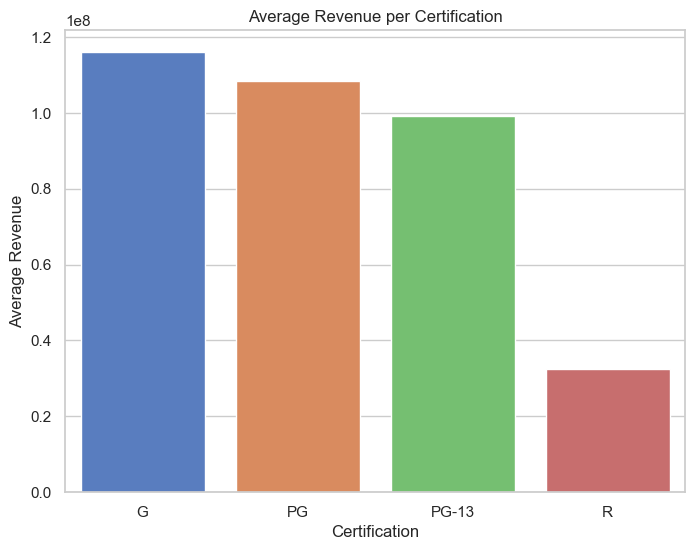

In [7]:
avg_revenue_by_certification = filtered_df.groupby('certification')['revenue'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='certification', y='revenue', data=avg_revenue_by_certification, palette="muted", order=['G', 'PG', 'PG-13', 'R'])
ax.set_title('Average Revenue per Certification')
ax.set_xlabel('Certification')
ax.set_ylabel('Average Revenue')

plt.show()

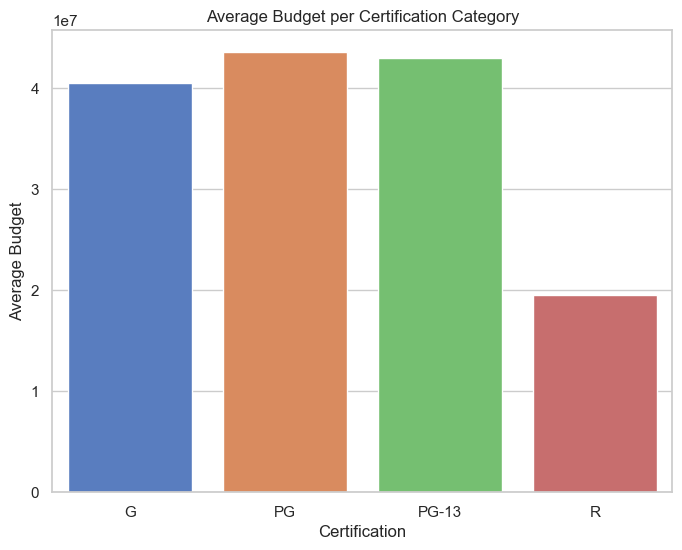

In [8]:
avg_budget_by_certification = filtered_df.groupby('certification')['budget'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='certification', y='budget', data=avg_budget_by_certification, palette="muted", order=['G', 'PG', 'PG-13', 'R'])
ax.set_title('Average Budget per Certification Category')
ax.set_xlabel('Certification')
ax.set_ylabel('Average Budget')

plt.show()
